<a href="https://colab.research.google.com/github/dejunga/ML-Vehicle_Image_Classification/blob/main/train_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'vehicle-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5521913%2F9142550%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240910%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240910T111846Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3181f9a75dd97d91817dc2370d400da1917ff2a6dc83d18c683291cf3d15215173ecf33b34150ce0f40378e372215506e4885e339aba2658cddadf87508849acd718ae4569928ec22a1f72bedbef187be2d4675646e4686b612576b864dbfa8998607787999d745ab7465dcfa117d46c194a2482e23c77d2db02d7cfd1b1eee420d8a5364e1782fefbf4c44411d6f3309b376a7fb535ba405d5b233ba7f5903e63476183f6aa51dd3c55f66096a023e0fa139ef3b3e4b382c5929e1501cd9e7209e4459f56c64bf7c500c19f8709cf43451c6e8da3663223eac2d9301b819e2665f6b9c62ff51fc68ba753059235f999a3defcabf57aa73533452950d7e7c506'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 866783573 bytes downloaded
Downloaded and uncompressed: vehicle-classification
Data source import complete.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 560 images in train/Auto Rickshaws
Found 560 images in train/Bikes
Found 553 images in train/Cars
Found 560 images in train/Motorcycles
Found 560 images in train/Planes
Found 560 images in train/Ships
Found 560 images in train/Trains
Found 120 images in val/Auto Rickshaws
Found 120 images in val/Bikes
Found 118 images in val/Cars
Found 120 images in val/Motorcycles
Found 120 images in val/Planes
Found 120 images in val/Ships
Found 120 images in val/Trains
Found 120 images in test/Auto Rickshaws
Found 120 images in test/Bikes
Found 119 images in test/Cars
Found 120 images in test/Motorcycles
Found 120 images in test/Planes
Found 120 images in test/Ships
Found 120 images in test/Trains


epoch,train_loss,valid_loss,accuracy,time
0,0.614933,0.258261,0.922434,00:22


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.234581,0.164461,0.949881,00:31
1,0.136521,0.184149,0.947494,00:32
2,0.117718,0.143090,0.959427,00:32
3,0.104237,0.124729,0.971360,00:32
4,0.065315,0.152747,0.966587,00:32
5,0.041072,0.130394,0.970167,00:32
6,0.043869,0.148011,0.965394,00:31
7,0.027012,0.137417,0.972554,00:29
8,0.019389,0.128234,0.968974,00:29
9,0.018127,0.131184,0.970167,00:30


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in by

Training history saved at /content/drive/My Drive/models/fastai_model_history.pkl
FastAI model trained and saved to Google Drive successfully!


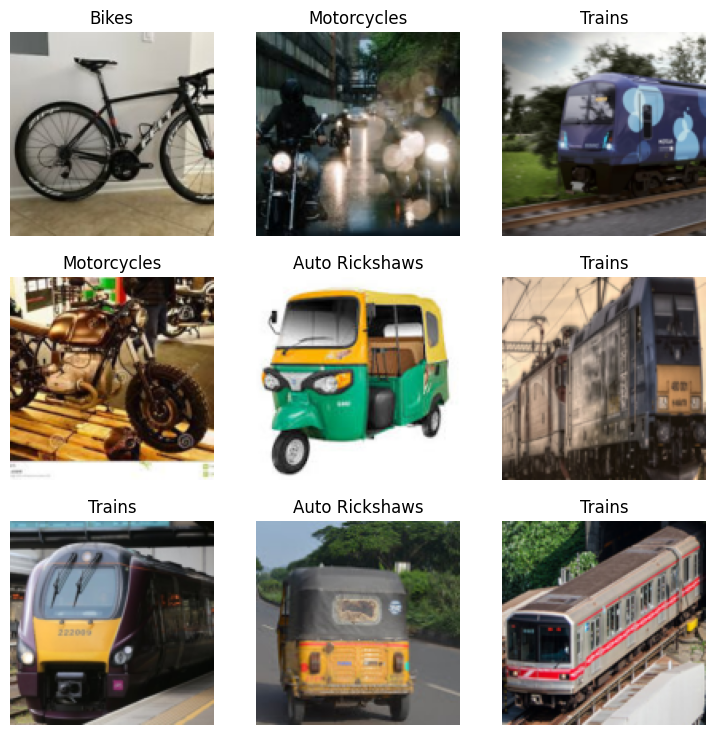

In [2]:
# Import necessary libraries
import os
import shutil
from sklearn.model_selection import train_test_split
from fastai.vision.all import *
from google.colab import drive
import pickle  # Added to save the training history

# Mount Google Drive
drive.mount('/content/drive')

# Set up directories for training data
main_dir = "/content/drive/My Drive/Vehicles"  # Adjust this to your path
categories = ["Auto Rickshaws", "Bikes", "Cars", "Motorcycles", "Planes", "Ships", "Trains"]
base_split_dir = "/content/drive/My Drive/vehicles_split"  # Adjust path for Colab

# Check if the base_split_dir exists, if not create it and split the dataset
if not os.path.exists(base_split_dir):
    split_dirs = ["train", "val", "test"]

    for split_dir in split_dirs:
        for category in categories:
            os.makedirs(os.path.join(base_split_dir, split_dir, category), exist_ok=True)
            print(f"Directory created: {os.path.join(base_split_dir, split_dir, category)}")

    # Split the data and move images to appropriate directories
    for category in categories:
        category_path = os.path.join(main_dir, category)

        # Ensure the directory exists
        if not os.path.exists(category_path):
            print(f"Directory not found: {category_path}")
            continue

        images = os.listdir(category_path)
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

        # Function to move images into respective folders
        def move_images(image_list, destination):
            for image in image_list:
                shutil.copy(os.path.join(category_path, image), os.path.join(base_split_dir, destination, category, image))

        move_images(train_images, "train")
        move_images(val_images, "val")
        move_images(test_images, "test")

    print("Data split into train, validation, and test sets successfully!")

# Check how many images were copied into each category and split
split_dirs = ["train", "val", "test"]
for split_dir in split_dirs:
    for category in categories:
        num_images = len(os.listdir(os.path.join(base_split_dir, split_dir, category)))
        print(f"Found {num_images} images in {split_dir}/{category}")

# Set up FastAI DataBlock for image classification
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='val'),
    get_y=parent_label,
    item_tfms=Resize(128))

# Load data
dls = dblock.dataloaders(base_split_dir, batch_size=32)

# Show batch of images to verify everything is correct
dls.show_batch(max_n=9)

# Create a FastAI learner using a pre-trained ResNet model
learn = vision_learner(dls, resnet18, metrics=accuracy)

# ***MODIFICATION STARTS HERE***
# Train the model and capture the history
history = learn.fine_tune(10)  # Train the model

# Save the training history (losses, accuracies, etc.)
history_data = {
    'train_loss': learn.recorder.losses,
    'valid_loss': learn.recorder.values,
    'accuracy': learn.recorder.metrics[0].value  # Accuracy
}

# Save the history data
history_save_path = '/content/drive/My Drive/models/fastai_model_history.pkl'
with open(history_save_path, 'wb') as file_pi:
    pickle.dump(history_data, file_pi)

print(f"Training history saved at {history_save_path}")
# ***MODIFICATION ENDS HERE***

# Save the model to Google Drive
save_dir = '/content/drive/My Drive/models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

learn.export(os.path.join(save_dir, 'fastai_vehicle_model.pkl'))

print("FastAI model trained and saved to Google Drive successfully!")